# Drill - KNN Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing as preproc
import scipy
import seaborn as sns
%matplotlib inline

In [3]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

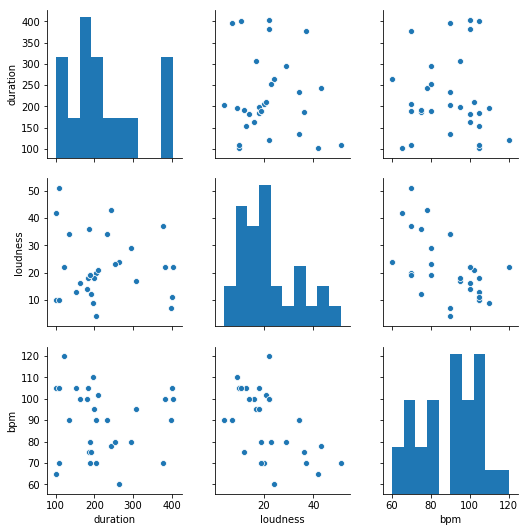

In [4]:
sns.pairplot(music)
plt.show()

In [5]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [6]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
duration    30 non-null int64
loudness    30 non-null int64
bpm         30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [7]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


In [8]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [9]:
def knn_unweighted_and_weighted(df, num):
    # Build our model.
    knn = neighbors.KNeighborsRegressor(n_neighbors=num)
    X = pd.DataFrame(df['duration'])
    Y = df['bpm']
    knn.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 410, 0.1)[:, np.newaxis]

    # Trailing underscores are a common convention for a prediction.
    Y_ = knn.predict(T)

    plt.scatter(X, Y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K={}, Unweighted'.format(num))
    plt.show()

    # Run the same model, this time with weights.
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=num, weights='distance')
    X = pd.DataFrame(df['duration'])
    Y = df['bpm']
    knn_w.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 410, 0.1)[:, np.newaxis]

    Y_ = knn_w.predict(T)

    plt.scatter(X, Y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K={}, Weighted'.format(num))
    plt.show()
    
    score = cross_val_score(knn, X, Y, cv=5)
    print('k =', num)
    print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_w = cross_val_score(knn_w, X, Y, cv=5)
    print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
    
    print('\n'*2)

In [10]:
nums = [10, 5, 4, 3]

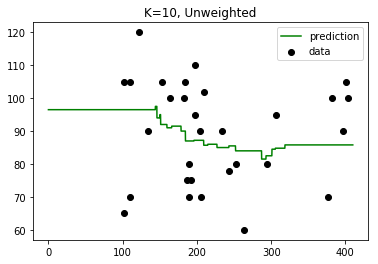

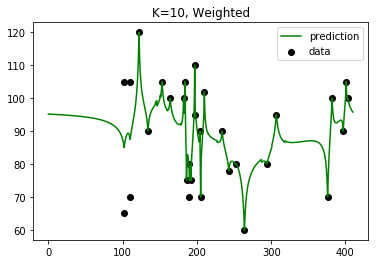

k = 10
Unweighted Accuracy: -0.44 (+/- 0.81)
Weighted Accuracy: -0.78 (+/- 0.77)





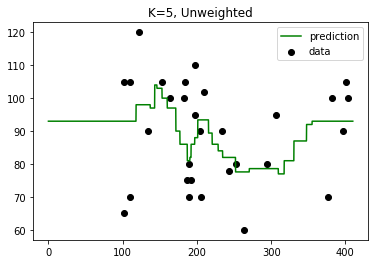

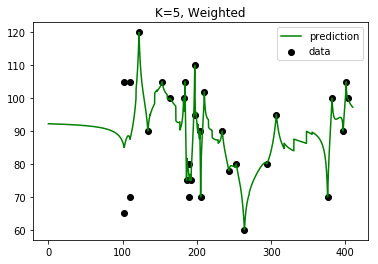

k = 5
Unweighted Accuracy: -0.70 (+/- 1.02)
Weighted Accuracy: -0.94 (+/- 0.90)





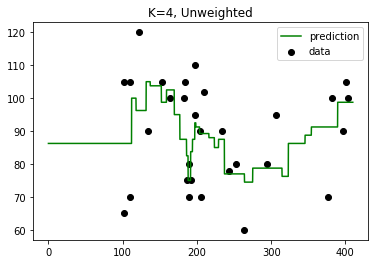

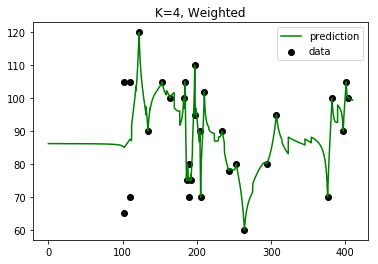

k = 4
Unweighted Accuracy: -0.76 (+/- 0.70)
Weighted Accuracy: -0.94 (+/- 0.86)





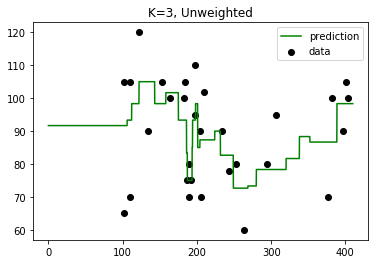

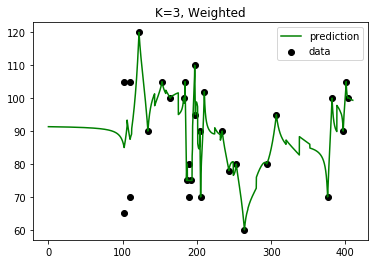

k = 3
Unweighted Accuracy: -0.34 (+/- 0.27)
Weighted Accuracy: -0.88 (+/- 0.98)





In [11]:
for k in nums:
    knn_unweighted_and_weighted(music, k)